# 2.1 Vergleich der Stromgestehungskosten konventioneller Erzeugungsanlagen

a)

Heizwert:
    - Steinkohle: 7.8kWh/kg
    - Erdgas: 10kWh/m^3
    - Biomasse: 5kWh/kg
    
Brennstoffkosten:
    - Steinkohle: 0.1€/kg
    - Erdgas: 0.3€/m^3
    - Biomasse: 0.25€/kg
CO2 Zertifikatskosten: 10€/t CO2
Kalkulationszinsatz = 4%

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [58]:
Kalkulationszinsatz = 0.04
q = 1 + Kalkulationszinsatz
CO2_zertifikat = 10  # €/t

def Kostenrechner(K_investition, K_fix, K_variabel, etha, laufzeit, volllast, emission, heizwert, preis):
    # Annuitätenfaktor:
    alpha = q**laufzeit*Kalkulationszinsatz / (q**laufzeit - 1)

    # jährliche Kapitalskosten Kohle:
    Cc = alpha*K_investition/volllast  # €/MWh

    # jährliche Fixkosten:
    C_fix = Cc/laufzeit + K_fix/volllast       # €/MWh/a 

    # Brennstoffkosten:
    # if Abfrage wegen wasserkraft (verhindert division durch 0):
    if heizwert == 0:
        C_fuel = 0
    else:
        Brennstoffpreis = preis / heizwert * 1000  # €/MWh/a
        C_fuel = Brennstoffpreis / etha  # €/MWh/a

    # Emmisionskosten:
    C_co2 = emission * CO2_zertifikat / etha     # €/MWh/a

    # Variable kosten:
    C_var = K_variabel  # €/MWh/a

    # totale jährliche Kosten:
    C = (C_fix + C_fuel + C_co2 + C_var)
    return C  

In [59]:
# Kohlekraftwerk:
K_investition_kohle = 1950000 # €/MW
K_fix_kohle = 57200           # €/MW/a
K_variabel_kohle = 2          # €/MWhel
etha_kohle = 0.38             # %
laufzeit_kohle = 40           # a
volllast_kohle = 7300         # h/a
emission_kohle = 0.35         # tCO2/MWhprim
heizwert_kohle = 7.8          # kWh/kg
preis_kohle = 0.1             # €/kg
C_kohle = Kostenrechner(K_investition_kohle, K_fix_kohle, K_variabel_kohle, etha_kohle, laufzeit_kohle, 
                        volllast_kohle, emission_kohle, heizwert_kohle, preis_kohle)
print("Jährliche Stromgestehungskosten Kohlekraft in €/MWh: " + str(C_kohle))

# GuD:
K_investition_GuD = 870000  # €/MW
K_fix_GuD = 32000           # €/MW/a
K_variabel_GuD = 2.3        # €/MWhel
etha_GuD = 0.59             # %
laufzeit_GuD = 35           # a
volllast_GuD = 3000         # h/a
emission_GuD = 0.2          # tCO2/MWhprim
heizwert_GuD = 10           # kWh/m^3
preis_GuD = 0.3             # €/m^3

C_GuD = Kostenrechner(K_investition_GuD, K_fix_GuD, K_variabel_GuD, etha_GuD, laufzeit_GuD, 
                        volllast_GuD, emission_GuD, heizwert_GuD, preis_GuD)
print("Jährliche Stromgestehungskosten GuD in €/MWh: " + str(C_GuD))

# GT:
K_investition_GT = 600000  # €/MW
K_fix_GT = 0               # €/MW/a
K_variabel_GT = 2.4        # €/MWhel
etha_GT = 0.41             # %
laufzeit_GT = 30           # a
volllast_GT = 1500         # h/a
emission_GT = 0.2          # tCO2/MWhprim
heizwert_GT = 10           # kWh/m^3
preis_GT = 0.3             # €/m^3

C_GT = Kostenrechner(K_investition_GT, K_fix_GT, K_variabel_GT, etha_GT, laufzeit_GT, 
                        volllast_GT, emission_GT, heizwert_GT, preis_GT)
print("Jährliche Stromgestehungskosten GT in €/MWh: " + str(C_GT))


# Biomasse:
K_investition_Biomasse = 2600000 # €/MW
K_fix_Biomasse = 29000           # €/MW/a
K_variabel_Biomasse = 3.9        # €/MWhel
etha_Biomasse = 0.29             # %
laufzeit_Biomasse = 30           # a
volllast_Biomasse = 8000         # h/a
emission_Biomasse = 0            # tCO2/MWhprim
heizwert_Biomasse = 5            # kWh/kg
preis_Biomasse = 0.25            # €/kg

C_Biomasse = Kostenrechner(K_investition_Biomasse, K_fix_Biomasse, K_variabel_Biomasse, etha_Biomasse, 
                           laufzeit_Biomasse, volllast_Biomasse, emission_Biomasse, heizwert_Biomasse, 
                           preis_Biomasse)
print("Jährliche Stromgestehungskosten Biomasse in €/MWh: " + str(C_Biomasse))

# Wasserkraft:
K_investition_Wasserkraft = 4500000 # €/MW
K_fix_Wasserkraft = 14000           # €/MW/a
K_variabel_Wasserkraft = 0          # €/MWhel
etha_Wasserkraft = 1                # %
laufzeit_Wasserkraft = 50           # a
volllast_Wasserkraft = 6000         # h/a
emission_Wasserkraft = 0            # tCO2/MWhprim
heizwert_Wasserkraft = 0            # kWh/kg
preis_Wasserkraft = 0               # €/kg

C_Wasserkraft = Kostenrechner(K_investition_Wasserkraft, K_fix_Wasserkraft, K_variabel_Wasserkraft, etha_Wasserkraft, 
                           laufzeit_Wasserkraft, volllast_Wasserkraft, emission_Wasserkraft, heizwert_Wasserkraft, 
                           preis_Wasserkraft)
print("Jährliche Stromgestehungskosten Wasserkraft in €/MWh: " + str(C_Wasserkraft))

Jährliche Stromgestehungskosten Kohlekraft in €/MWh: 53.121734401398164
Jährliche Stromgestehungskosten GuD in €/MWh: 67.6478811875969
Jährliche Stromgestehungskosten GT in €/MWh: 81.2198484762537
Jährliche Stromgestehungskosten Biomasse in €/MWh: 180.56528584406294
Jährliche Stromgestehungskosten Wasserkraft in €/MWh: 3.0315863400764567


b)

<IPython.core.display.Javascript object>


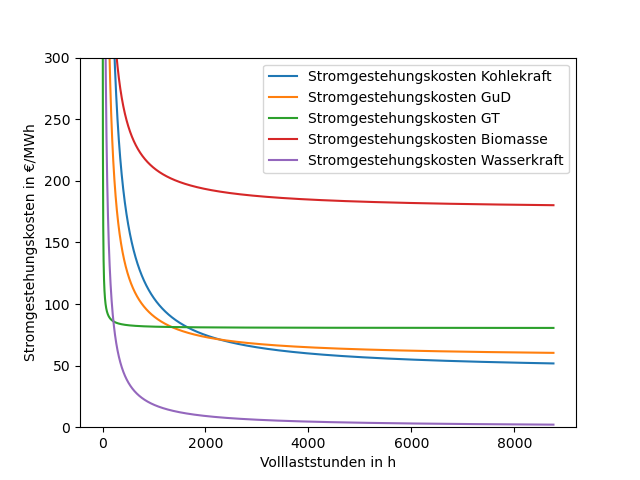

(0.0, 300.0)

In [61]:
# Volllaststunden:
T = np.arange(1,8761)

C_kohle = Kostenrechner(K_investition_kohle, K_fix_kohle, K_variabel_kohle, etha_kohle, laufzeit_kohle, 
                        T, emission_kohle, heizwert_kohle, preis_kohle)
C_GuD = Kostenrechner(K_investition_GuD, K_fix_GuD, K_variabel_GuD, etha_GuD, laufzeit_GuD, 
                        T, emission_GuD, heizwert_GuD, preis_GuD)
C_GT = Kostenrechner(K_investition_GT, K_fix_GT, K_variabel_GT, etha_GT, laufzeit_GT, 
                        T, emission_GT, heizwert_GT, preis_GT)
C_Biomasse = Kostenrechner(K_investition_Biomasse, K_fix_Biomasse, K_variabel_Biomasse, etha_Biomasse, 
                           laufzeit_Biomasse, T, emission_Biomasse, heizwert_Biomasse, 
                           preis_Biomasse)
C_Wasserkraft = Kostenrechner(K_investition_Wasserkraft, K_fix_Wasserkraft, K_variabel_Wasserkraft, etha_Wasserkraft, 
                           laufzeit_Wasserkraft, T, emission_Wasserkraft, heizwert_Wasserkraft, 
                           preis_Wasserkraft)

fig = plt.figure()
plt.plot(T, C_kohle, label="Stromgestehungskosten Kohlekraft")
plt.plot(T, C_GuD, label="Stromgestehungskosten GuD")
plt.plot(T, C_GT, label="Stromgestehungskosten GT")
plt.plot(T, C_Biomasse, label="Stromgestehungskosten Biomasse")
plt.plot(T, C_Wasserkraft, label="Stromgestehungskosten Wasserkraft")
plt.legend()
plt.ylabel("Stromgestehungskosten in €/MWh")
plt.xlabel("Volllaststunden in h")
plt.ylim(0,300)


c)!!! Die Stromgestehungskosten von Biomasse- und Kohlekraftwerken sinken mit zunehmenden Volllaststunden am geringsten. Das liegt zum Einen an den hohen fixen Wartungskosten, zum anderen an den hohen Emmisionskosten bei Kohle und an den hohen Brennstoffkosten bei Biomasse (0.05 €/kWh). Die Brennstoffkosten von Gas (0.03 €/kWh) sind zwar höher als die der  Kohle (0.013 €/kWh), jedoch wirken sich bei GT und GuD Kraftwerken die höheren Effizienzen sowie die geringeren Emmisionskosten positiv auf die Preisentwicklung aus. Die Stromgestehungskosten sinken bei einem GT Kraftwerk am schellsten mit steigenden Volllasstunden ab, und bleiben dann auf einem konstanten Niveau. Das liegt an den geringen Spezifischen Investitionskosten und an den nicht vorhandenen fixen Wartungskosten. Wird ein Gaskraftwerk mehr als ~3800 Stunden betrieben, wird das GuD Kraftwerk aufgrund seines höheren Wirkungsgrades kosteneffizienter. Wasserkraft hat extrem hohe spezifische Investitionskosten, aber dafür geringe fixe Wartungskosten und keine Brennstoffkosten sowie eine sehr hohe Lebensdauer. Dadurch ist ein Wasserkraftwerk sehr schnell (ab ~600 Volllaststunden) billiger als alle anderen Kraftwerke.!!! ÄNDERN

# 2.2 Merit-Order und Strompreis über einen Tag

In [115]:
df_kraftwerkspark = pd.read_excel("Tagesdaten_und_Kraftwerkspark.xlsx")

installierte_leistung = df_kraftwerkspark.loc[:, ["Technologie", "Installierte elektrische Leistung [MW]"]]
installierte_leistung = installierte_leistung.dropna().set_index("Technologie")
print(installierte_leistung)

                 Installierte elektrische Leistung [MW]
Technologie                                            
Kohlekraftwerke                                  4000.0
GuD                                              3000.0
Gasturbinen                                      4500.0
Biomasse                                         2000.0
Laufwasserkraft                                  2500.0


a)

In [74]:
def Grenzkostenrechner(K_variabel, etha, emission, heizwert, preis, CO2_zertifikat):
    # Brennstoffkosten:
    # if Abfrage wegen wasserkraft (verhindert division durch 0):
    if heizwert == 0:
        C_fuel = 0
    else:
        Brennstoffpreis = preis / heizwert * 1000  # €/MWh/a
        C_fuel = Brennstoffpreis / etha  # €/MWh/a

    # Emmisionskosten:
    C_co2 = emission * CO2_zertifikat / etha     # €/MWh/a

    # Variable kosten:
    C_var = K_variabel  # €/MWh/a
    
    # kurzfristige Grenzkosten:
    C_grenz = C_var + C_co2 + C_fuel
    
    return C_grenz

In [159]:
CO2_zertifikat_low = 10
CO2_zertifikat_high = 100
# Preis bei 10€/tCO2 (low):
installierte_leistung["Grenzkosten low"] = 0
installierte_leistung.loc["Kohlekraftwerke", "Grenzkosten low"] = Grenzkostenrechner(K_variabel_kohle, 
                                                                 etha_kohle,emission_kohle, heizwert_kohle, 
                                                                 preis_kohle, CO2_zertifikat_low)

installierte_leistung.loc["GuD", "Grenzkosten low"] = Grenzkostenrechner(K_variabel_GuD, etha_GuD, emission_GuD,
                                                                    heizwert_GuD, preis_GuD, CO2_zertifikat_low)

installierte_leistung.loc["Gasturbinen", "Grenzkosten low"] = Grenzkostenrechner(K_variabel_GT, etha_GT, 
                                                              emission_GT, heizwert_GT, 
                                                              preis_GT, CO2_zertifikat_low)

installierte_leistung.loc["Biomasse", "Grenzkosten low"] = Grenzkostenrechner(K_variabel_Biomasse, 
                                                            etha_Biomasse, emission_Biomasse, 
                                                            heizwert_Biomasse, preis_Biomasse, 
                                                                              CO2_zertifikat_low)

installierte_leistung.loc["Laufwasserkraft", "Grenzkosten low"] = Grenzkostenrechner(K_variabel_Wasserkraft, 
                                                                etha_Wasserkraft, emission_Wasserkraft, 
                                                                heizwert_Wasserkraft, preis_Wasserkraft, 
                                                                                     CO2_zertifikat_low)



# Preis bei 100€/tCO2 (high):
installierte_leistung["Grenzkosten high"] = 0
installierte_leistung.loc["Kohlekraftwerke", "Grenzkosten high"] = Grenzkostenrechner(K_variabel_kohle, 
                                                                etha_kohle,emission_kohle, heizwert_kohle, 
                                                                 preis_kohle, CO2_zertifikat_high)

installierte_leistung.loc["GuD", "Grenzkosten high"] = Grenzkostenrechner(K_variabel_GuD, etha_GuD, 
                                                    emission_GuD, heizwert_GuD, preis_GuD, CO2_zertifikat_high)

installierte_leistung.loc["Gasturbinen", "Grenzkosten high"] = Grenzkostenrechner(K_variabel_GT, etha_GT, 
                                                              emission_GT, heizwert_GT, 
                                                              preis_GT, CO2_zertifikat_high)

installierte_leistung.loc["Biomasse", "Grenzkosten high"] = Grenzkostenrechner(K_variabel_Biomasse, 
                                                            etha_Biomasse, emission_Biomasse, 
                                                            heizwert_Biomasse, preis_Biomasse, 
                                                            CO2_zertifikat_high)

installierte_leistung.loc["Laufwasserkraft", "Grenzkosten high"] = Grenzkostenrechner(K_variabel_Wasserkraft, 
                                                                etha_Wasserkraft, emission_Wasserkraft, 
                                                                heizwert_Wasserkraft, preis_Wasserkraft, 
                                                                CO2_zertifikat_high)

print(installierte_leistung)


                 Installierte elektrische Leistung [MW]  Grenzkosten low  \
Technologie                                                                
Kohlekraftwerke                                  4000.0        44.948718   
GuD                                              3000.0        56.537288   
Gasturbinen                                      4500.0        80.448780   
Biomasse                                         2000.0       176.313793   
Laufwasserkraft                                  2500.0         0.000000   

                 Grenzkosten high  
Technologie                        
Kohlekraftwerke        127.843455  
GuD                     87.045763  
Gasturbinen            124.351220  
Biomasse               176.313793  
Laufwasserkraft          0.000000  


In [185]:
for i in range(len(low_CO2)):
    if i == len(low_CO2)-2:
        break
    else:
        print(installierte_leistung.iloc[i+1, 0])


3000.0
4500.0
2000.0


<IPython.core.display.Javascript object>


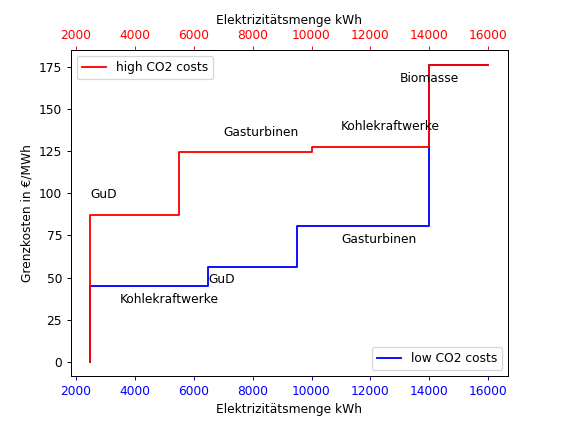

                 Installierte elektrische Leistung [MW]  Grenzkosten low
Technologie                                                             
Laufwasserkraft                                  2500.0         0.000000
Kohlekraftwerke                                  6500.0        44.948718
GuD                                              9500.0        56.537288
Gasturbinen                                     14000.0        80.448780
Biomasse                                        16000.0       176.313793
                 Installierte elektrische Leistung [MW]  Grenzkosten high
Technologie                                                              
Laufwasserkraft                                  2500.0          0.000000
GuD                                              5500.0         87.045763
Gasturbinen                                     10000.0        124.351220
Kohlekraftwerke                                 14000.0        127.843455
Biomasse                                     

In [204]:
# Merit-Order plot:
fig2 = plt.figure()
ax1 = plt.gca()
ax2 = plt.twiny()

low_CO2 = installierte_leistung.sort_values(by=["Grenzkosten low"]).drop(columns={"Grenzkosten high"})
high_CO2 = installierte_leistung.sort_values(by=["Grenzkosten high"]).drop(columns={"Grenzkosten low"})


# addieren der installierten kapazitäten:
for i in range(len(low_CO2)):
    if i == (len(low_CO2)-1):
        break
    else:
        low_CO2.iloc[i+1, 0] = low_CO2.iloc[i+1, 0] + low_CO2.iloc[i, 0]
        high_CO2.iloc[i+1, 0] = high_CO2.iloc[i+1, 0] + high_CO2.iloc[i, 0]

    
print(low_CO2)
print(high_CO2)


ax1.step(low_CO2["Installierte elektrische Leistung [MW]"], low_CO2["Grenzkosten low"], 
         color="Blue", label="low CO2 costs")
ax2.step(high_CO2["Installierte elektrische Leistung [MW]"], high_CO2["Grenzkosten high"], 
         color="Red", label="high CO2 costs")


ax1.tick_params(axis='x', colors='blue')
ax2.tick_params(axis='x', colors='red')
ax1.legend(loc="lower right")
ax2.legend(loc=0)

ax1.set_ylabel("Grenzkosten in €/MWh")
ax1.set_xlabel("Elektrizitätsmenge kWh")
ax2.set_xlabel("Elektrizitätsmenge kWh")

for index, row in low_CO2.iterrows():
    plt.annotate(str(index),(row["Installierte elektrische Leistung [MW]"]-3000,row["Grenzkosten low"]-10))
for index, row in high_CO2.iterrows():
    plt.annotate(str(index),(row["Installierte elektrische Leistung [MW]"]-3000,row["Grenzkosten high"]+10))


plt.show()